In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import pandas as pd
file_path = '/content/drive/MyDrive/house /Houseprices(Sheet1).csv'
data = pd.read_csv(file_path)
print(data.head())

   Area  Bedrooms  Age(years)  Prices($)
0  1500         3          10     300000
1  2000         4           5     500000
2  1200         2          15     250000
3  1800         3           7     400000
4  2200         4           3     600000


In [57]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/house /Houseprices(Sheet1).csv'
data = pd.read_csv(file_path)

# Define features and target
X = data[['Area', 'Bedrooms', 'Age(years)']]
y = data['Prices($)']

# Split data (60:40 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
















In [58]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_unnormalized = model.predict(X_test)
mse_unnormalized = mean_squared_error(y_test, y_pred_unnormalized)
r2_unnormalized = r2_score(y_test, y_pred_unnormalized)

In [59]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [60]:
model_normalized = LinearRegression()
model_normalized.fit(X_train_normalized, y_train)
y_pred_normalized = model_normalized.predict(X_test_normalized)
mse_normalized = mean_squared_error(y_test, y_pred_normalized)
r2_normalized = r2_score(y_test, y_pred_normalized)

print("Without Normalization:")
print(f"Mean Squared Error (MSE): {mse_unnormalized}")
print(f"R² Score: {r2_unnormalized}")

print("\nWith Normalization:")
print(f"Mean Squared Error (MSE): {mse_normalized}")
print(f"R² Score: {r2_normalized}")

Without Normalization:
Mean Squared Error (MSE): 3878033777.2088156
R² Score: -0.5512135108835263

With Normalization:
Mean Squared Error (MSE): 14677777777.777756
R² Score: -4.8711111111111025


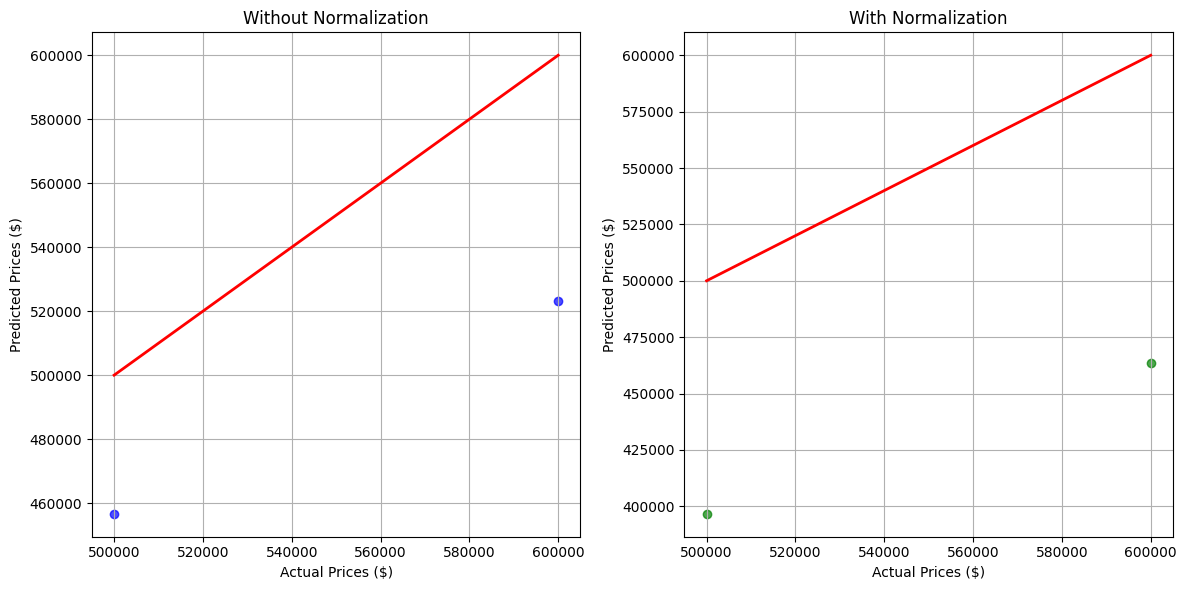

In [61]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_unnormalized, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Without Normalization')
plt.xlabel('Actual Prices ($)')
plt.ylabel('Predicted Prices ($)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_normalized, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('With Normalization')
plt.xlabel('Actual Prices ($)')
plt.ylabel('Predicted Prices ($)')
plt.grid(True)

plt.tight_layout()
plt.show()


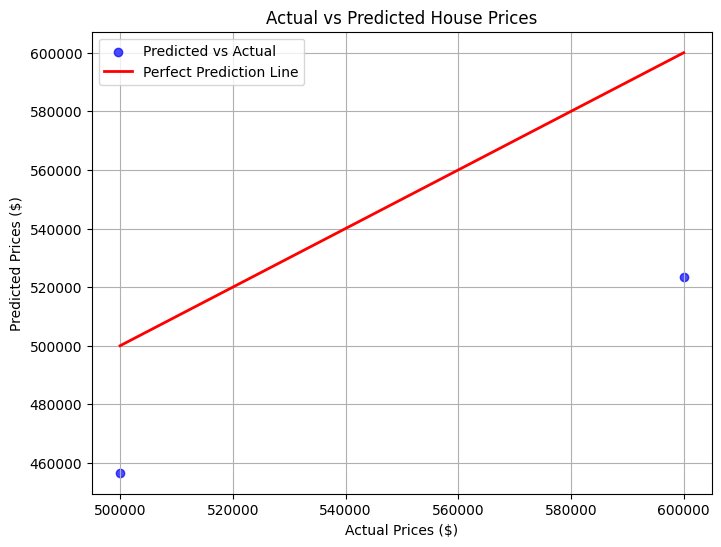

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_unnormalized, color='blue', alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices ($)')
plt.ylabel('Predicted Prices ($)')
plt.legend()
plt.grid(True)
plt.show()
